# Bimodal distribution

In [1]:
%pylab inline

from matplotlib.pyplot import style
import matplotlib.pyplot as plt

# use custom plots from minibrain
style.use('https://raw.githubusercontent.com/JoseGuzman/minibrain/master/minibrain/paper.mplstyle')

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Load data

In [2]:
mydata = pd.read_csv('./DataSets/Y79_diameter.csv')

print(f'{mydata.shape[0]} observations')
mydata.describe()

2763 observations


,diameter
count,2763.000000
mean,16.531981
std,5.206652
min,7.146955
25%,13.657391
50%,14.884002
75%,17.024398
max,59.313876


# Bimodal distribution of all observations

In [3]:
from scipy.optimize import curve_fit

In [4]:
# Define gaussian mixture
def gauss(x,mu,sigma,A):
    """
    Solves the Gaussian function of the form:
    f(x; mu, sigma, A), where
    
    x is the observation
    mu is the location of the mean
    sigma is the standard deviation
    A is the amplitude of the Gaussian function.
    """
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

In [5]:
myblue = '#55a0fb'
myred = '#f94040'

,params,sigma
mu1,21.805595,1.698167
sigma1,-5.368227,1.453279
A1,100.845700,13.239578
mu2,14.312376,0.050227
sigma2,1.720839,0.077657
A2,952.710459,36.109420


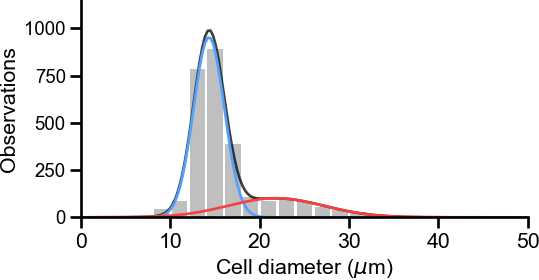

In [6]:
diameters = mydata.diameter.values

plt.figure(figsize=(6,3))
mybins = np.arange(0,60,2)
y, x, _ = plt.hist(diameters, mybins, color='k', histtype= 'bar', rwidth=.85, alpha =0.25)

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

expected = (15, 10, 2, 50, 29, 10)

params,cov = curve_fit(bimodal,x,y,expected)
xfit = np.linspace(0,60,200)


plt.plot(xfit,bimodal(xfit,*params), color='k', lw=2, alpha=0.75)
plt.ylabel('Observations');
plt.xlabel('Cell diameter ($\mu$m)');
plt.xticks(np.arange(0,61,10));
plt.xlim(xmin=0, xmax=50)
plt.ylim(top=1150)

# Plot Gaussians

sigma = np.sqrt(np.diag(cov))
fit_diam = pd.DataFrame(data={'params':params,'sigma':sigma},index=bimodal.__code__.co_varnames[1:])
myparams = fit_diam.params
plt.plot(xfit, gauss(xfit,mu=myparams.mu2,sigma=myparams.sigma2,A=myparams.A2), color=myblue)
plt.plot(xfit, gauss(xfit,mu=myparams.mu1,sigma=myparams.sigma1,A=myparams.A1), color=myred)
fit_diam